In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Collect Data
X = np.array([[0,0,1],
              [1,0,0],
              [0,1,0],
              [1,1,0]   
])

y = np.array([[1],
              [0],
              [0],
              [1]    
])

In [68]:
#build model



#initalizing weights
syn0 = 2*np.random.random((3,3)) - 1
syn1 = 2*np.random.random((3,1)) - 1
print(syn0, end="\n\n")
print(syn1)


[[ 0.06185974 -0.57438186  0.82615939]
 [-0.90427311  0.64191109  0.63237687]
 [ 0.77322499  0.54825345  0.34994696]]

[[-0.17346892]
 [ 0.86374126]
 [-0.04477516]]


In [59]:
def nonlin(x, deriv=False):
    if deriv == True:
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [69]:
# Step 3: Train Model
num_epochs = 2001

for j in range(num_epochs):
    #feed forward through layers 0, 1, 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0)) # where the magic happens
    l2 = nonlin(np.dot(l1,syn1))
    
    # how much did we miss the target value?
    l2_error = y - l2
    
    if(j% 1000) == 0:
        print( "Error: ", str(np.mean(np.abs(l2_error))))
    #in what direction is the target value?
    l2_delta = l2_error*nonlin(l2, deriv=True)
    
    #how much did each l1 value contribute to l2 error
    l1_error = l2_delta.dot(syn1.T)
    
    l1_delta = l1_error * nonlin(l1, deriv=True)
    
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

Error:  0.494756115029
Error:  0.0404807975299
Error:  0.0243304037146


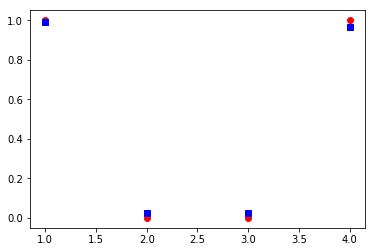

In [70]:
axis = np.array([[1],[2],[3],[4]])

#plt.scatter(X[0], y)
plt.plot(axis ,y, "ro", axis, l2, "bs")
plt.show()
#print(l1)
#print(y)
#print(l2)

In [71]:
print(syn0, end="\n\n")
mid = np.dot([[1,1,1]], syn0)

print(mid, end="\n\n")

print(nonlin(mid), end="\n\n")

#print(syn1)
incoming  = np.multiply(syn1,nonlin(mid).T)
print(np.sum(incoming))

[[ 2.3181696   5.24471036  4.23781884]
 [-5.67895335 -2.01274271  4.30069112]
 [-0.66382738  2.8962457  -2.37543715]]

[[-4.02461114  6.12821334  6.1630728 ]]

[[ 0.01755663  0.99782427  0.99789865]]

3.73713380973


[[ 2.3181696   5.24471036  4.23781884]
 [-5.67895335 -2.01274271  4.30069112]
 [-0.66382738  2.8962457  -2.37543715]]

[[-8.22352378]
 [ 8.52495942]
 [-4.63463925]]


 [[ 0.99253108]
 [ 0.0272545 ]
 [ 0.02670612]
 [ 0.96413947]]


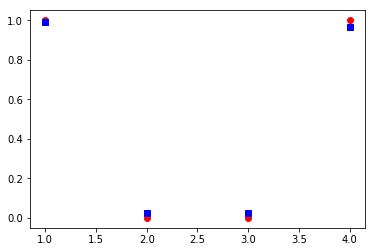

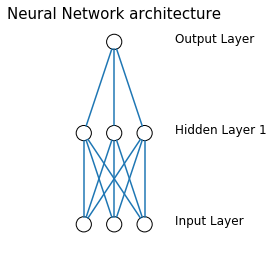

In [74]:

print(syn0, end="\n\n")
for x in range(3):
    #syn1[0][0] = 0
    break

print(syn1)

l1 = nonlin(np.dot(l0,syn0)) # where the magic happens
l2 = nonlin(np.dot(l1,syn1))

print("\n\n", l2)

plt.plot(axis ,y, "ro", axis, l2, "bs")
plt.show()

network = DrawNN([3,3,1])
network.draw()

In [9]:
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

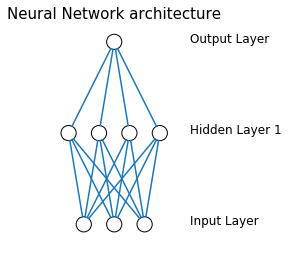

In [10]:
network = DrawNN([3, 4, 1])

network.draw()
